# Setting up Detectron2 

1. Install basic libraries and torch versions compatible for object detection 
2. Import the detectron 2 libararies 

In [13]:
!pip install pyyaml==5.1
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 976.4 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=c99fbf9e4433779b31e52b447c8b132e0a5d8f525b80d136ce9e860efad104a4
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
pytorch-lightning 1.7.6 requires PyYAML>=5.4, but you have pyyaml 5.1 which is incompatible.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.1 which is incompat

In [14]:
# Checking the version for torch installation 
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.7.1+cu101
True


In [15]:
# This installation of detectron depends upon the Cuda version and torch version we are having 
# cuda101/torch1.7
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 4.6 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.1/151.1 kB 723.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 3.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=aae66686d151c9076c4047e882610ad877d26e9c15778a4d6d3ab8cbdb37dba2
  Stored in dire

In [16]:
# Basic inputs to check everything is alright and installed well 
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
#import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg # Download the pretrained model in the machine using a pre_trained model 
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

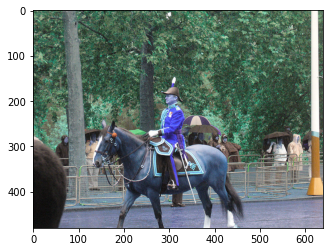

In [17]:
# Lets do some basic inferencing to see how we are doing 
import matplotlib.pyplot as plt
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
plt.imshow(im)
plt.show()

In [18]:
# Model Zoo : https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md
# We will need a config file to download a pre trained model and can do inferencing through that model 
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_280758.pkl: 167MB [00:08, 18.9MB/s]                              
/opt/conda/lib/python3.7/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


In [19]:
outputs

{'instances': Instances(num_instances=18, image_height=480, image_width=640, fields=[pred_boxes: Boxes(tensor([[123.9905, 246.0009, 465.4726, 480.0000],
         [254.7143, 165.5651, 338.0972, 402.3477],
         [560.3634, 272.5918, 595.7873, 380.3080],
         [ 49.5019, 275.1874,  80.3245, 346.6849],
         [114.2716, 270.5500, 146.3819, 395.3884],
         [386.8383, 270.6233, 413.4826, 304.4013],
         [  0.0000, 283.5258,  74.5102, 477.2873],
         [525.1984, 279.3255, 562.0998, 346.5454],
         [349.8879, 268.6679, 386.7182, 297.2816],
         [509.0715, 265.4884, 571.8232, 297.2948],
         [334.4685, 251.4249, 415.0666, 276.7700],
         [328.9205, 230.3655, 393.0422, 257.1115],
         [507.7985, 283.6647, 529.5579, 322.4533],
         [405.2158, 272.7800, 458.2541, 352.5485],
         [329.3698, 243.1214, 416.0018, 291.0695],
         [593.2812, 268.7844, 614.4711, 314.0315],
         [328.6485, 231.5701, 400.3633, 276.7859],
         [513.4103, 280.5280, 5

In [20]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([17,  0,  0,  0,  0,  0,  0,  0,  0, 25, 25, 25,  0,  0, 25,  0, 25,  0],
       device='cuda:0')
Boxes(tensor([[123.9905, 246.0009, 465.4726, 480.0000],
        [254.7143, 165.5651, 338.0972, 402.3477],
        [560.3634, 272.5918, 595.7873, 380.3080],
        [ 49.5019, 275.1874,  80.3245, 346.6849],
        [114.2716, 270.5500, 146.3819, 395.3884],
        [386.8383, 270.6233, 413.4826, 304.4013],
        [  0.0000, 283.5258,  74.5102, 477.2873],
        [525.1984, 279.3255, 562.0998, 346.5454],
        [349.8879, 268.6679, 386.7182, 297.2816],
        [509.0715, 265.4884, 571.8232, 297.2948],
        [334.4685, 251.4249, 415.0666, 276.7700],
        [328.9205, 230.3655, 393.0422, 257.1115],
        [507.7985, 283.6647, 529.5579, 322.4533],
        [405.2158, 272.7800, 458.2541, 352.5485],
        [329.3698, 243.1214, 416.0018, 291.0695],
        [593.2812, 268.7844, 614.4711, 314.0315],
        [328.6485, 231.5701, 400.3633, 276.7859],
        [513.4103, 280.5280, 560.8990, 

In [21]:
outputs["instances"]

Instances(num_instances=18, image_height=480, image_width=640, fields=[pred_boxes: Boxes(tensor([[123.9905, 246.0009, 465.4726, 480.0000],
        [254.7143, 165.5651, 338.0972, 402.3477],
        [560.3634, 272.5918, 595.7873, 380.3080],
        [ 49.5019, 275.1874,  80.3245, 346.6849],
        [114.2716, 270.5500, 146.3819, 395.3884],
        [386.8383, 270.6233, 413.4826, 304.4013],
        [  0.0000, 283.5258,  74.5102, 477.2873],
        [525.1984, 279.3255, 562.0998, 346.5454],
        [349.8879, 268.6679, 386.7182, 297.2816],
        [509.0715, 265.4884, 571.8232, 297.2948],
        [334.4685, 251.4249, 415.0666, 276.7700],
        [328.9205, 230.3655, 393.0422, 257.1115],
        [507.7985, 283.6647, 529.5579, 322.4533],
        [405.2158, 272.7800, 458.2541, 352.5485],
        [329.3698, 243.1214, 416.0018, 291.0695],
        [593.2812, 268.7844, 614.4711, 314.0315],
        [328.6485, 231.5701, 400.3633, 276.7859],
        [513.4103, 280.5280, 560.8990, 389.3964]], device='cu

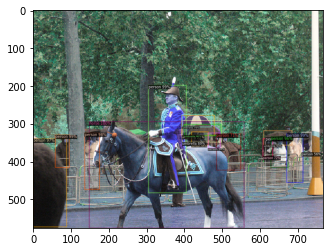

In [22]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])
plt.show()

# Converting Dataset to desired version for training. In this case we will convert the dataset to coco json format. 

In [4]:
# written by Cai
#You can find this code in https://github.com/ct990912/kaggle/blob/main/Arthropod_convert2coco.py
import os
import json
import random
import shutil

In [5]:
def getFile(root_path):
    file_list = list()
    for file in os.listdir(root_path):
        if ('.' in file) == False and file != "coco":
            file_list.append(file)
    return file_list


def getAllJson(path):
    file_list = list()
    for file in os.listdir(path):
        if file.split('.')[1] != "vott":
            file_list.append(path + '/' + file)
    return file_list


def read_json(path: str):
    with open(path, 'r') as f:
        data = json.load(f)
    return data


def getImg(path):
    img_list = list()
    for img_file in os.listdir(path):
        if img_file != "annotations":
            img_list.append(img_file)
    return img_list

In [6]:
def convert2coco(root_path, split_rate=0.1,saveFile=None):
    """
    Args:
        root_path(str): your data's root path, e.g., "/home/cai/data/ArTaxOr/".
        split_rate(float): Divide the dataset into training and validation sets.
        saveFile(str): if saveFile is None, converted data will store \
                in 'root_path/coco/'; if given, converted data will \
                store your own "saveFile".
    Examples:
        >>>convert2coco("/home/cai/data/ArTaxOr/", 0.1, "/home/cai/coco/")
    """
    
    if saveFile is None:
        saveFile=root_path+"coco/"
        if not os.path.exists(root_path + "coco/"):
            os.makedirs(root_path + "coco/")
        if not os.path.exists(root_path + "coco/annotations/"):
            os.makedirs(root_path + "coco/annotations/")
        if not os.path.exists(root_path + "coco/train/"):
            os.makedirs(root_path + "coco/train/")
        if not os.path.exists(root_path + "coco/val/"):
            os.makedirs(root_path + "coco/val/")
    else:
        if not os.path.exists(saveFile + "annotations/"):
            os.makedirs(saveFile + "annotations/")
        if not os.path.exists(saveFile + "train/"):
            os.makedirs(saveFile + "train/")
        if not os.path.exists(saveFile + "val/"):
            os.makedirs(saveFile + "val/")
    
    all_class_file = getFile(root_path)  # 分别获取每个分类的目录名，存在list里面
    coco_train_annotations = dict(images=list(), annotations=list(), categories=list())  # coco训练集annotations
    coco_val_annotations = dict(images=list(), annotations=list(), categories=list())  # coco验证集annotations
    coco_annotations = [coco_train_annotations, coco_val_annotations]  # 用于划分测试集和训练集
    img_idx = 10
    bbox_idx = 100000
    label_idx = 0
    # ----------------获取coco格式中的categories
    for idx, label in enumerate(all_class_file):
        category = dict(id=idx, supercategory="Arthropod", name=label)
        coco_annotations[0]["categories"].append(category)
        coco_annotations[1]["categories"].append(category)

    # ---------------获取coco格式中的images和annotations
    for each_class in all_class_file:
        print("start to convert "+each_class+'\n')
        root_img = root_path + each_class + '/'  # 某类图片的根路径
        all_annotations = getAllJson(root_path + each_class + "/annotations")  # 获取所有的json annotation
        for json_file in all_annotations:  # 访问单个json，并按splite_rate数据存入到coco_anotations中
            data = read_json(json_file)
            flag = 1 if random.random() < split_rate else 0  # 划分测试集和训练集 train:0; val: 1;
            shutil.copyfile(root_img + data["asset"]["name"],
                        saveFile + ("train/" if flag == 0 else "val/") + data["asset"]["name"])
            # ---------------获取coco格式中的image
            img = dict(file_name=data["asset"]["name"],
                       height=data["asset"]["size"]["height"],
                       width=data["asset"]["size"]["width"],
                       id=img_idx)
            coco_annotations[flag]["images"].append(img)
            #  [x, y, w, h]， 下面的代码是一张图里面的所有bbox append到annotations里面
            for region in data["regions"]:
                bbox = region["boundingBox"]
                anno = dict(image_id=img_idx, segmentation=[[]], area=240, iscrowd=0,
                            bbox=[bbox["left"], bbox["top"], bbox["width"], bbox["height"]],
                            id=bbox_idx, category_id=label_idx)
                bbox_idx += 1
                coco_annotations[flag]["annotations"].append(anno)

            img_idx += 1
        label_idx += 1

    with open(saveFile+"annotations/train.json", "w") as f:
        json.dump(coco_annotations[0], f)
    with open(saveFile + "annotations/val.json", "w") as f:
        json.dump(coco_annotations[1], f)
    print("finish...")

In [7]:
if __name__ == "__main__":
    convert2coco("../input/arthropod-taxonomy-orders-object-detection-dataset/ArTaxOr/",0.1,"./")

start to convert Coleoptera

start to convert Diptera

start to convert Hymenoptera

start to convert Hemiptera

start to convert Lepidoptera

start to convert Araneae

start to convert Odonata

finish...


In [10]:
# Folder ./val and ./train contains all the images 
os.listdir("./annotations")

['val.json', 'train.json']

In [84]:
json_file = "./annotations/train.json"
with open(json_file) as datafile:
  data = json.load(datafile)

print(data["annotations"][0])
print(data["images"][0])


{'image_id': 10, 'segmentation': [[]], 'area': 240, 'iscrowd': 0, 'bbox': [1508.7580978635424, 465.4533996897622, 824.0509993108201, 670.5232678386764], 'id': 100000, 'category_id': 0}
{'file_name': '34f2f8c20c6c.jpg', 'height': 2324, 'width': 3486, 'id': 10}


In [85]:
# We need to make sure that our train JSON looks like this for our training purposes 
# {'file_name': './train/34f2f8c20c6c.jpg',
# 'height': 2324,
# 'width': 3486,
# 'image_id': 10,
# 'annotations': [{'image_id': 10,
#   'segmentation': [[]],
#   'area': 240,
#   'iscrowd': 0,
#   'bbox': [1508.7580978635424,
#    465.4533996897622,
#    824.0509993108201,
#    670.5232678386764],
#   'id': 100000,
#   'category_id': 0,
#   'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}
category_dict = {0:'Coleoptera',1:'Diptera',2:'Hymenoptera',3:'Hemiptera',4:'Lepidoptera',5:'Araneae',6:'Odonata'}
from detectron2.structures import BoxMode
dataset_list_train = []
for image in data["images"]:
    image_dict = {'file_name':"./train/"+image["file_name"],'height':image['height'],'width':image['width'],'image_id':image['id'],
                 'annotation':[]}
    for annotations in data['annotations']:
        if annotations['image_id'] == image['id']:
            #annotations['category_id'] = category_dict[annotations['category_id']]
            image_dict['annotation'].append(annotations)
            image_dict['annotation'][0]['bbox_mode'] = BoxMode.XYWH_ABS
    dataset_list_train.append(image_dict)


In [86]:
dataset_list_train[0]

{'file_name': './train/34f2f8c20c6c.jpg',
 'height': 2324,
 'width': 3486,
 'image_id': 10,
 'annotation': [{'image_id': 10,
   'segmentation': [[]],
   'area': 240,
   'iscrowd': 0,
   'bbox': [1508.7580978635424,
    465.4533996897622,
    824.0509993108201,
    670.5232678386764],
   'id': 100000,
   'category_id': 0,
   'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}

# Lets register this coco dataset 

In [87]:
def my_dataset_function():
  ...
  return dataset_list_train

from detectron2.data import DatasetCatalog
DatasetCatalog.register("my_dataset_3", my_dataset_function)
# later, to access the data:
#data: List[Dict] = DatasetCatalog.get("my_dataset")

In [88]:
data = DatasetCatalog.get("my_dataset_3")
data[0]

{'file_name': './train/34f2f8c20c6c.jpg',
 'height': 2324,
 'width': 3486,
 'image_id': 10,
 'annotation': [{'image_id': 10,
   'segmentation': [[]],
   'area': 240,
   'iscrowd': 0,
   'bbox': [1508.7580978635424,
    465.4533996897622,
    824.0509993108201,
    670.5232678386764],
   'id': 100000,
   'category_id': 0,
   'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}

In [89]:
classes

['Coleoptera',
 'Diptera',
 'Hymenoptera',
 'Hemiptera',
 'Lepidoptera',
 'Araneae',
 'Odonata']

In [90]:
from detectron2.data import MetadataCatalog
MetadataCatalog.get("my_dataset_3").set(thing_classes=classes)
MetadataCatalog.get("my_dataset_3").set(thing_dataset_id_to_contiguous_id={0: 0,
                                             1: 1,
                                             2: 2,
                                             3: 3,
                                             4: 4,
                                             5: 5,
                                             6: 6})

namespace(name='my_dataset_3',
          thing_classes=['Coleoptera',
                         'Diptera',
                         'Hymenoptera',
                         'Hemiptera',
                         'Lepidoptera',
                         'Araneae',
                         'Odonata'],
          thing_dataset_id_to_contiguous_id={0: 0,
                                             1: 1,
                                             2: 2,
                                             3: 3,
                                             4: 4,
                                             5: 5,
                                             6: 6})

In [91]:
microcontroller_metadata = MetadataCatalog.get("my_dataset_3")

In [92]:
microcontroller_metadata

namespace(name='my_dataset_3',
          thing_classes=['Coleoptera',
                         'Diptera',
                         'Hymenoptera',
                         'Hemiptera',
                         'Lepidoptera',
                         'Araneae',
                         'Odonata'],
          thing_dataset_id_to_contiguous_id={0: 0,
                                             1: 1,
                                             2: 2,
                                             3: 3,
                                             4: 4,
                                             5: 5,
                                             6: 6})

In [29]:
# Registering coco instance 
from detectron2.data.datasets import register_coco_instances
register_coco_instances("Arthropod Taxanomy", {}, "./annotations/train.json", "./train")

In [30]:
sample_metadata = MetadataCatalog.get("Arthropod Taxanomy")
dataset_dicts = DatasetCatalog.get("Arthropod Taxanomy")

WARNING [10/21 03:47:11 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/21 03:47:11 d2.data.datasets.coco]: Loaded 13802 images in COCO format from ./annotations/train.json
WARNING [10/21 03:47:11 d2.data.datasets.coco]: Filtered out 17636 instances without valid segmentation. There might be issues in your dataset generation process.  Please check https://detectron2.readthedocs.io/en/latest/tutorials/datasets.html carefully


In [31]:
sample_metadata

namespace(name='Arthropod Taxanomy',
          json_file='./annotations/train.json',
          image_root='./train',
          evaluator_type='coco',
          thing_classes=['Coleoptera',
                         'Diptera',
                         'Hymenoptera',
                         'Hemiptera',
                         'Lepidoptera',
                         'Araneae',
                         'Odonata'],
          thing_dataset_id_to_contiguous_id={0: 0,
                                             1: 1,
                                             2: 2,
                                             3: 3,
                                             4: 4,
                                             5: 5,
                                             6: 6})

In [32]:
import pandas as pd 
json_file = "./annotations/train.json"
with open(json_file) as datafile:
  data = json.load(datafile)

data["annotations"][0]

{'image_id': 10,
 'segmentation': [[]],
 'area': 240,
 'iscrowd': 0,
 'bbox': [1508.7580978635424,
  465.4533996897622,
  824.0509993108201,
  670.5232678386764],
 'id': 100000,
 'category_id': 0}

In [33]:
dataset_dicts[0]

{'file_name': './train/34f2f8c20c6c.jpg',
 'height': 2324,
 'width': 3486,
 'image_id': 10,
 'annotations': []}

In [34]:
# I was not getting annotations in my data and hence decided to do that manually 
for dict_image in dataset_dicts:
    image_id = dict_image['image_id']
    for annotations in data['annotations']:
        if annotations['image_id'] == image_id:
            #dict_annotation = {"class_id":annotations['category_id'],"top":annotations['bbox'][1],"left":annotations['bbox'][0],"width":annotations['bbox'][2],"height":annotations['bbox'][3]}
            annotations['bbox_mode'] = BoxMode.XYWH_ABS
            dict_image["annotations"].append(annotations)

In [35]:
dataset_dicts[0]

{'file_name': './train/34f2f8c20c6c.jpg',
 'height': 2324,
 'width': 3486,
 'image_id': 10,
 'annotations': [{'image_id': 10,
   'segmentation': [[]],
   'area': 240,
   'iscrowd': 0,
   'bbox': [1508.7580978635424,
    465.4533996897622,
    824.0509993108201,
    670.5232678386764],
   'id': 100000,
   'category_id': 0,
   'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}

{'file_name': './train/f902cd657ec1.jpg', 'height': 1365, 'width': 2048, 'image_id': 14161, 'annotations': [{'image_id': 14161, 'segmentation': [[]], 'area': 240, 'iscrowd': 0, 'bbox': [936.0083073727933, 149.8948598130841, 362.6002076843198, 1083.2827102803737], 'id': 118258, 'category_id': 6, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}


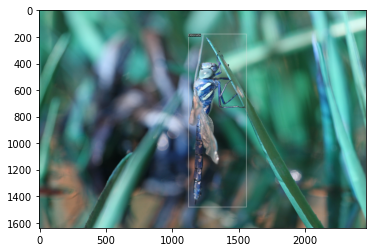

{'file_name': './train/29f0b1cc57e7.jpg', 'height': 2048, 'width': 1639, 'image_id': 6539, 'annotations': [{'image_id': 6539, 'segmentation': [[]], 'area': 240, 'iscrowd': 0, 'bbox': [421.0536595394737, 527.6934865900383, 854.7894736842105, 1267.2490421455939], 'id': 108682, 'category_id': 3, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}


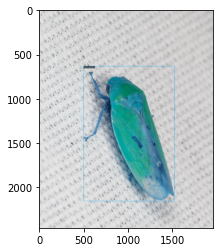

{'file_name': './train/30f5e96b2100.jpg', 'height': 2592, 'width': 3456, 'image_id': 4480, 'annotations': [{'image_id': 4480, 'segmentation': [[]], 'area': 240, 'iscrowd': 0, 'bbox': [1984.9655172413793, 1708.1379310344828, 551.1724137931035, 702.6206896551724], 'id': 105714, 'category_id': 2, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'image_id': 4480, 'segmentation': [[]], 'area': 240, 'iscrowd': 0, 'bbox': [1192.9655172413793, 625.6551724137931, 680.2758620689656, 702.6206896551724], 'id': 105715, 'category_id': 2, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}


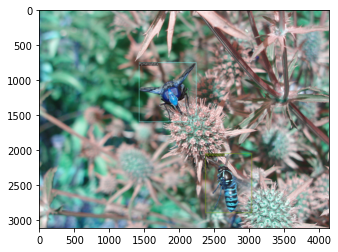

{'file_name': './train/d6e0d925014e.jpg', 'height': 686, 'width': 783, 'image_id': 7975, 'annotations': [{'image_id': 7975, 'segmentation': [[]], 'area': 240, 'iscrowd': 0, 'bbox': [0, 30.883141762452105, 532.6058619966443, 610.4348659003831], 'id': 110540, 'category_id': 3, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}


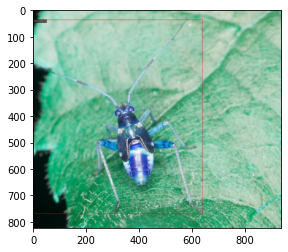

In [36]:
import random
from detectron2.structures import BoxMode

for d in random.sample(dataset_dicts, 4):
    print(d)
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=sample_metadata, scale=1.2)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image()[:, :, ::-1])
    plt.show()

# Lets Train

In [93]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_3",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0025  # pick a good LR
cfg.SOLVER.MAX_ITER = 700    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 7  # (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.




In [94]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=True)

[10/21 04:40:09 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

In [95]:
trainer.train()

[10/21 04:40:15 d2.engine.train_loop]: Starting training from iteration 0
ERROR [10/21 04:40:15 d2.engine.train_loop]: Exception during training:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/detectron2/engine/train_loop.py", line 149, in train
    self.run_step()
  File "/opt/conda/lib/python3.7/site-packages/detectron2/engine/defaults.py", line 497, in run_step
    self._trainer.run_step()
  File "/opt/conda/lib/python3.7/site-packages/detectron2/engine/train_loop.py", line 273, in run_step
    loss_dict = self.model(data)
  File "/opt/conda/lib/python3.7/site-packages/torch/nn/modules/module.py", line 727, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/detectron2/modeling/meta_arch/rcnn.py", line 157, in forward
    proposals, proposal_losses = self.proposal_generator(images, features, gt_instances)
  File "/opt/conda/lib/python3.7/site-packages/torch/nn/modules/module.py", line 727, in _ca

AssertionError: RPN requires gt_instances in training!